Training a neural network model to classify images of clothing - sneakers vs shirts.  
*Uses tensorflow keras*  
**Data used:** The fashion MNIST dataset which contains 70,000 grayscale images in 10 categories. <sup>1</sup>

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

C:\Users\sumas\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


4423680/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt','Sneaker', 'Bag', 'Ankle boot']

**Data Exploration:**

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

**Preprocessing the data**

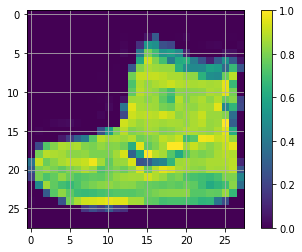

In [25]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)
plt.show()

> 1. The pixel values range from 0 to 255
> 2. Preprocessing them to range between 0 and 1

In [26]:
train_images = train_images/255.0
test_images = test_images/255.0

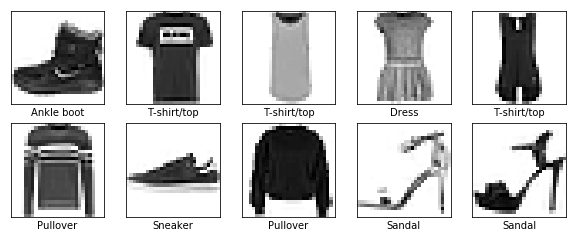

In [27]:
plt.figure(figsize = (10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

**Building the model**  
1. Configuring the layers of the model
2. Compiling the model  

**First Layer: tf.keras.layers.Flatten** transforms the format of the images from a 2D-array of (28x28 pixels) to 1D-array of 28x28=784 pixels. This layer has no parameters to learn; it only reformats the data.  
Sequence of two **```tf.keras.layers.Dense```** layers: Densely[fully] connected. First layer has 128 nodes and second layer has 10 nodes- it returns an array of 10 probability scores that sum to 1

In [14]:
sequence_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])

**Compiling the model**  
1. Minimizing the Loss function - To calculate and measure how accurate the model has been during the training.  
2. Optimizer - This is how the model is updated based on the data it sees and it's loss function.
3. Metrics - Used to monitor the training and testing steps. The example uses accuracy - the fraction of images correctly classified. 

In [15]:
sequence_model.compile(optimizer=tf.train.AdamOptimizer(),
                      loss = 'sparse_categorical_crossentropy',
                      metrics = ['accuracy'])

**Training the model**  
1. Feed training data to the model
2. Make prediction for test data

In [17]:
sequence_model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 6s 104us/step - loss: 0.5023 - acc: 0.8237
Epoch 2/5
60000/60000 [==============================] - 6s 96us/step - loss: 0.3773 - acc: 0.8634
Epoch 3/5
60000/60000 [==============================] - 6s 97us/step - loss: 0.3394 - acc: 0.8779
Epoch 4/5
60000/60000 [==============================] - 6s 97us/step - loss: 0.3150 - acc: 0.8842
Epoch 5/5
60000/60000 [==============================] - 6s 97us/step - loss: 0.2955 - acc: 0.8912


In [19]:
test_loss, test_acc = sequence_model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 58us/step
Test accuracy: 0.8672


**Making Predictions and checking for how the prediction is happening**

In [21]:
predictions = sequence_model.predict(test_images)
predictions[0]
np.argmax(predictions[0])

9

In [22]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{}{:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array),
                                       class_names[true_label]),color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')


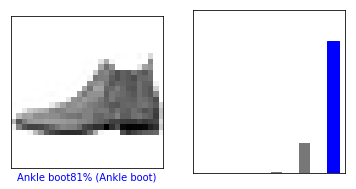

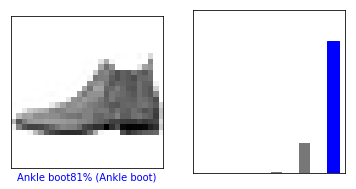

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

**References**  
1. All the examples are a direct implementation from the tensorflow tutorials.  
[tensorflow tutorials](https://www.tensorflow.org/tutorials/keras/basic_classification)